 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

whale_returns_path = os.getcwd()+'\\Resources\\whale_returns.csv'
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

## The below code converts the date to datetime
#whale_returns['Date'] = whale_returns['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').date())

In [3]:
# Count nulls

whale_returns_null_values = whale_returns.isna().sum().sum()
print(f"There are {whale_returns_null_values} null values in the whale_returns dataframe.")

There are 4 null values in the whale_returns dataframe.


In [4]:
# Drop nulls

whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns

algo_returns_path = os.getcwd()+'\\Resources\\algo_returns.csv'
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls

algo_returns_null_values = algo_returns.isna().sum().sum()
print(f"There are {algo_returns_null_values} null values in the algo_returns dataframe.")

# Convert `Date` from string to datetime
#algo_returns['Date'] = algo_returns['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').date())

There are 6 null values in the algo_returns dataframe.


In [7]:
# Drop nulls

algo_returns = algo_returns.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices

spTsx_history_path = os.getcwd()+'\\Resources\\sp_tsx_history.csv'
spTsx_history = pd.read_csv(spTsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

## The below code converts Date to datetime
#spTsx_history['Date'] = spTsx_history['Date'].apply(lambda x: dt.datetime.strptime(x, '%d-%b-%Y').date())

In [9]:
# Check Data Types

spTsx_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

spTsx_history['Close'] = spTsx_history['Close'].apply(lambda x: x.replace('$', ''))
spTsx_history['Close'] = spTsx_history['Close'].apply(lambda x: x.replace(',', ''))
spTsx_history['Close'] = spTsx_history['Close'].apply(lambda x: float(x))

In [11]:
# Calculate Daily Returns

#spTsx_history['S&P TSX'] =  (spTsx_history['Close']/spTsx_history['Close'].shift(1))-1
spTsx_history['S&P TSX'] = spTsx_history['Close'].pct_change()

In [12]:
# Drop nulls

spTsx_history = spTsx_history.dropna()

In [13]:
# Delete the `Close` prices from the data as we no longer need it.

spTsx_history.drop('Close', inplace=True, axis=1)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

returns = pd.merge(whale_returns, algo_returns, on='Date', how='left')
returns = pd.merge(returns, spTsx_history, on='Date', how='left')

returns.head()

#returns.set_index('Date', inplace=True)--don't need this anymore

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

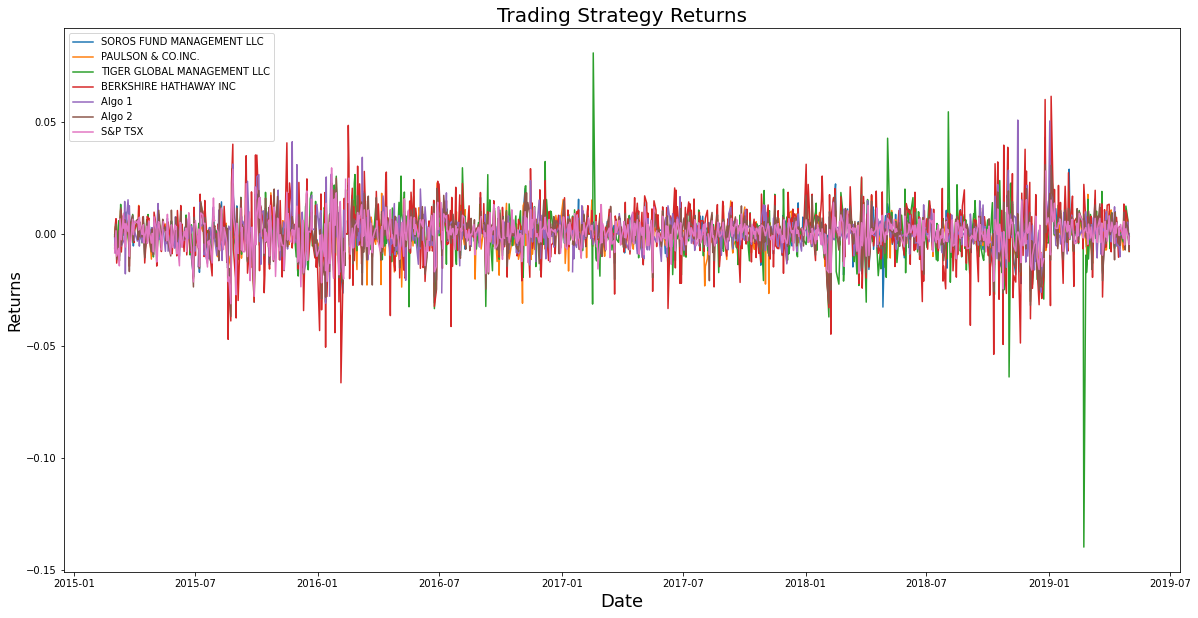

In [16]:
# Plot of All Strategy Returns

fig = plt.figure(figsize=(20,10))
plt.plot(returns)
plt.title("Trading Strategy Returns", fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Returns', fontsize=16)
plt.legend(returns.columns)
plt.show()

In [17]:
# Plot of individual Strategy Returns
# Uncomment the below to see the individual daily fund returns

'''
for fund in returns.columns:
    y=returns[fund]
    fig = plt.figure(figsize=(20,10))
    plt.plot(x,y)
    plt.title(fund, fontsize=20)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Returns', fontsize=16)
    plt.show()

'''

"\nfor fund in returns.columns:\n    y=returns[fund]\n    fig = plt.figure(figsize=(20,10))\n    plt.plot(x,y)\n    plt.title(fund, fontsize=20)\n    plt.xlabel('Date', fontsize=18)\n    plt.ylabel('Returns', fontsize=16)\n    plt.show()\n\n"

#### Calculate and Plot cumulative returns.

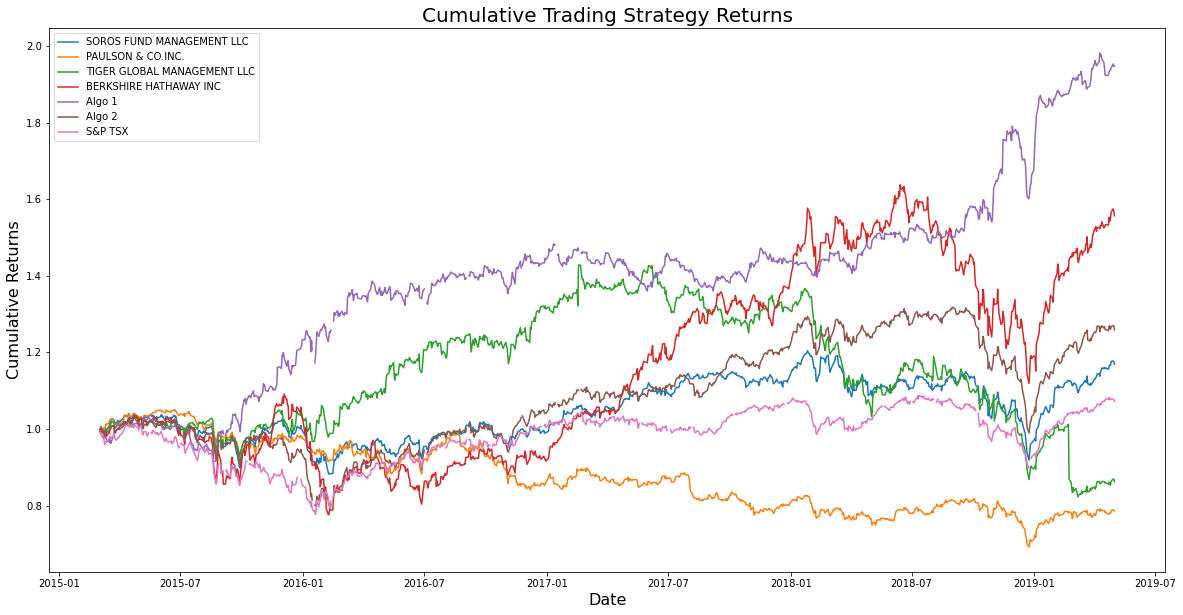

In [18]:
# Calculate cumulative returns of all portfolios

# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + returns).cumprod()

# Plot cumulative returns

fig = plt.figure(figsize=(20,10))
plt.plot(cumulative_returns)
plt.title("Cumulative Trading Strategy Returns", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=16)
plt.legend(cumulative_returns.columns)
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

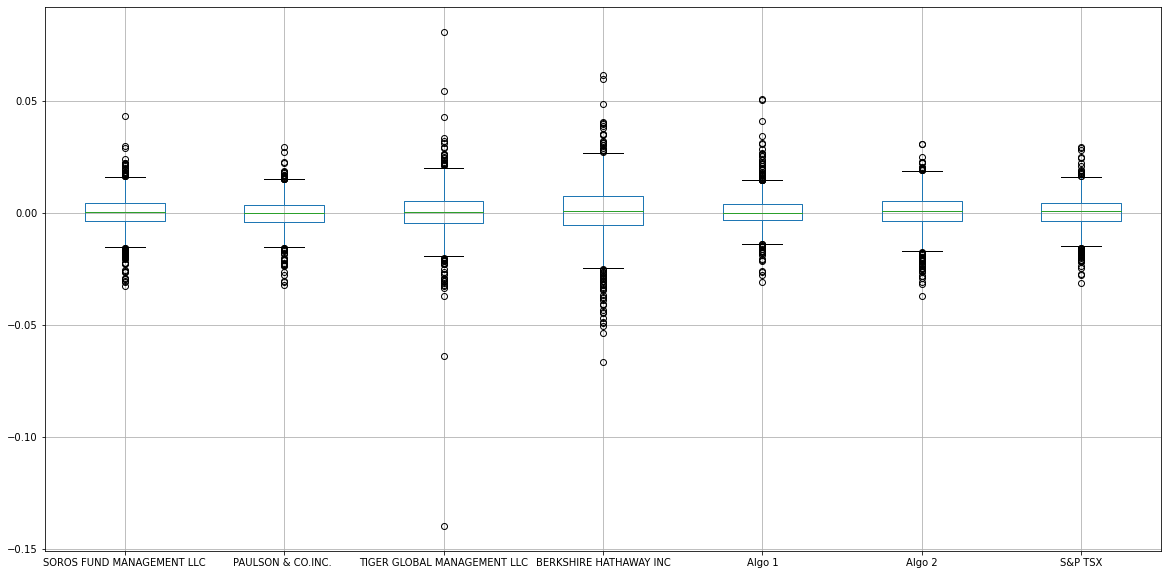

In [19]:
# Box plot to visually show risk

returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios

stdDev_returns = returns.std()
stdDev_returns

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007601
Algo 2                         0.008327
S&P TSX                        0.007036
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate the daily standard deviation of S&P TSX 60
stdDev_TSX = stdDev_returns['S&P TSX']

# Determine which portfolios are riskier than the S&P TSX 60

riskierPortfolios = []
lowerRiskPortfolios = []

for i in range(0, len(stdDev_returns)):
    if stdDev_returns[i] == stdDev_TSX:
        pass
    elif stdDev_returns[i] > stdDev_TSX:
        riskierPortfolios.append(stdDev_returns.index[i])
    else:
        lowerRiskPortfolios.append(stdDev_returns.index[i])

print('The following portfolios have higher risk than the S&P TSX Index:')
for strategy in riskierPortfolios:
    print(strategy)
    
print('\nThe following portfolios have lower risk than the S&P TSX Index:')
for strategy in lowerRiskPortfolios:
    print(strategy)

The following portfolios have higher risk than the S&P TSX Index:
SOROS FUND MANAGEMENT LLC
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2

The following portfolios have lower risk than the S&P TSX Index:
PAULSON & CO.INC. 


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_stdDev_returns = stdDev_returns*np.sqrt(252)
annualized_stdDev_returns

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.120660
Algo 2                         0.132186
S&P TSX                        0.111691
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

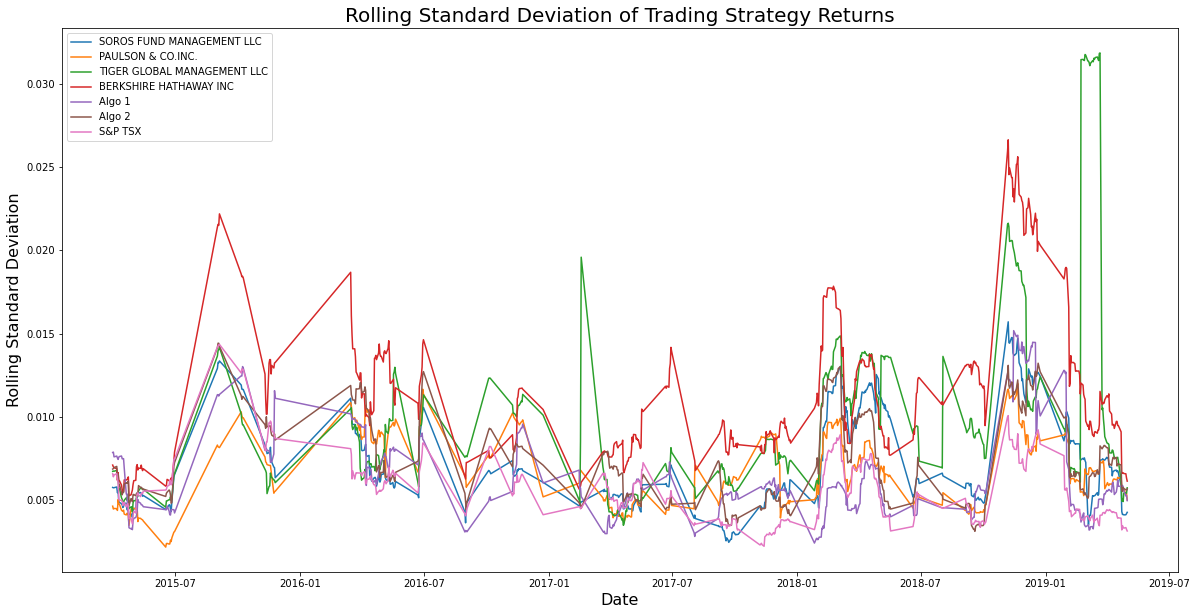

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rollingStdDev = returns.rolling(21).std()
rollingStdDev = rollingStdDev.dropna()

# Plot the rolling standard deviation

fig = plt.figure(figsize=(20,10))
plt.plot(rollingStdDev)
plt.title("Rolling Standard Deviation of Trading Strategy Returns", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rolling Standard Deviation', fontsize=16)
plt.legend(rollingStdDev.columns)
plt.show()

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
corr_matrix = returns.corr()
# Display the correlation matrix
corr_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.671796
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.485006
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,0.439204
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,0.555474
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.288367,0.310276
Algo 2,0.826719,0.677993,0.508139,0.687717,0.288367,1.000000,0.737370
S&P TSX,0.671796,0.485006,0.439204,0.555474,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

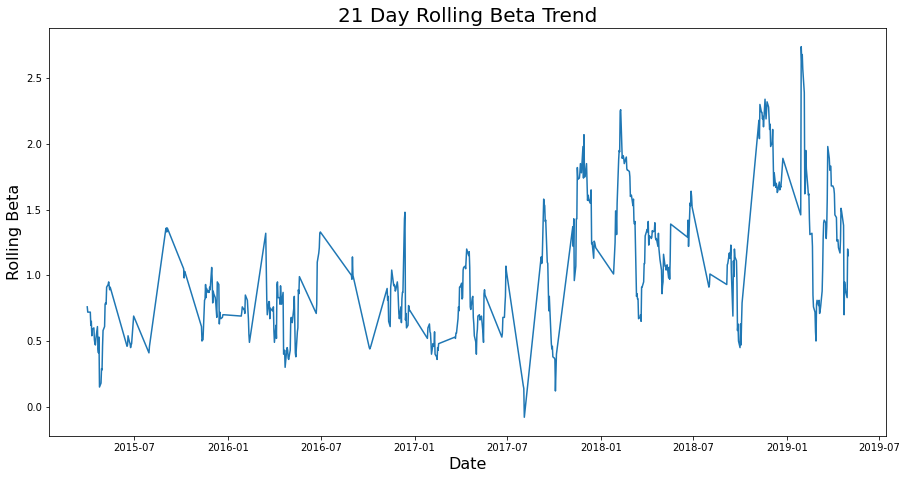

In [25]:
# Calculate covariance of a single portfolio

portfolio = 'BERKSHIRE HATHAWAY INC'
covariance = returns[portfolio].cov(returns['S&P TSX'])

# Calculate variance of S&P TSX

variance = returns['S&P TSX'].var()

# Computing beta
beta = round((covariance/variance),2)

# Plot beta trend

# First Calculate the rolling 21 day Beta
rollingCovariance = returns[portfolio].rolling(21).cov(returns['S&P TSX'])
rollingVariance = returns['S&P TSX'].rolling(21).var()

matrix = {'covariance': rollingCovariance, 'variance': rollingVariance}

betaCalc = pd.DataFrame(matrix)
betaCalc = betaCalc.dropna()

betaCalc['beta'] = round(betaCalc['covariance']/betaCalc['variance'],2)

betaTrend = betaCalc[['beta']]

# Next Plot the Rolling 21 Day Beat Trend

fig = plt.figure(figsize=(15,7.5))
plt.plot(betaTrend)
plt.title("21 Day Rolling Beta Trend", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rolling Beta', fontsize=16)
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

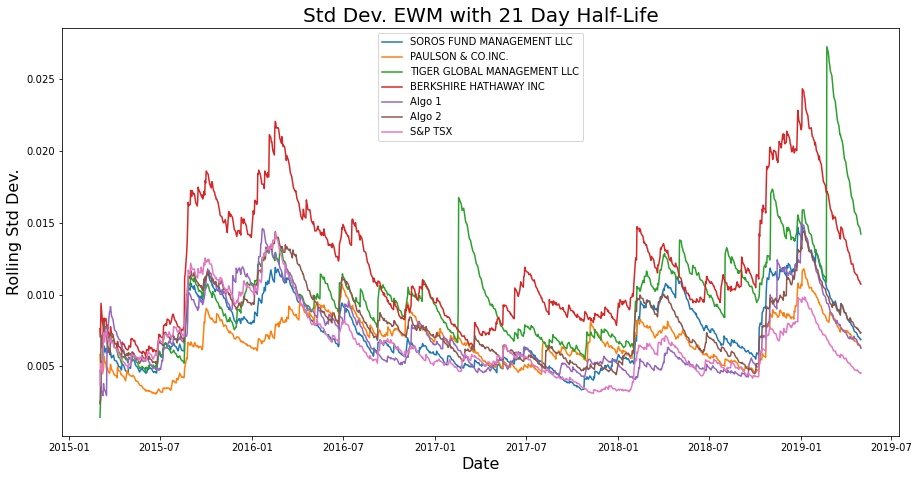

In [26]:
# Use `ewm` to calculate the rolling window

returns_ewm = returns.ewm(halflife=21).std()

fig = plt.figure(figsize=(15,7.5))
plt.plot(returns_ewm)
plt.title("Std Dev. EWM with 21 Day Half-Life", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rolling Std Dev.', fontsize=16)
plt.legend(returns_ewm.columns)
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios

rf_rate = 0.0002 #I've assumed a risk-free rate of 5% per annum or 0.02% daily.

returns['rf_rate'] = rf_rate

# Calculate Sharpe Ratio
sharpe_ratios = ((returns.mean()-returns['rf_rate'].mean()) * 252) / (returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.043292
PAULSON & CO.INC.             -0.917192
TIGER GLOBAL MANAGEMENT LLC   -0.411570
BERKSHIRE HATHAWAY INC         0.372183
Algo 1                         0.970720
Algo 2                         0.104156
S&P TSX                       -0.243664
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

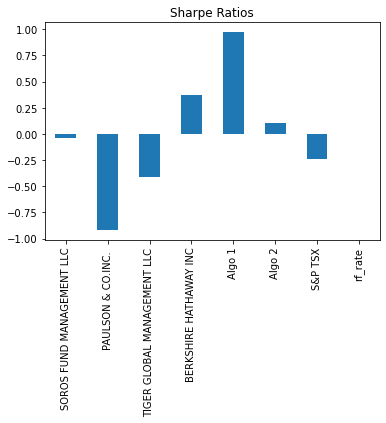

In [28]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

### The Algo 1 strategy outperforms both the market and the whale portfolio from a risk/return perspective (sharpe ratios). The Algo 2 strategy performs better than the market but not better than Berkshire Hathaway Inc. It does outperform the other whale portfolio's but not the Algo 2 strategy or Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock

l_path = os.getcwd()+'\\Resources\\l_historical.csv'
l_historical = pd.read_csv(l_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
symbol1 = l_historical['Symbol'][0]

In [30]:
# Reading data from 2nd stock

otex_path = os.getcwd()+'\\Resources\\otex_historical.csv'
otex_historical = pd.read_csv(otex_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
symbol2 = otex_historical['Symbol'][0]

In [31]:
# Reading data from 3rd stock

shop_path = os.getcwd()+'\\Resources\\shop_historical.csv'
shop_historical = pd.read_csv(shop_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
symbol3 = shop_historical['Symbol'][0]

In [32]:
# Combine all stocks in a single DataFrame

combined_stocks = pd.concat([l_historical, otex_historical, shop_historical], axis="columns", join="inner")

In [33]:
# Reset Date index
combined_stocks.sort_index(inplace=True)

In [34]:
# Reorganize portfolio data by having a column per symbol

del combined_stocks['Symbol']
combined_stocks.columns = [symbol1, symbol2, symbol3]

In [35]:
# Calculate daily returns

combined_stocks['L_returns'] = combined_stocks['L'].pct_change()
combined_stocks['OTEX_returns'] = combined_stocks['OTEX'].pct_change()
combined_stocks['SHOP_returns'] = combined_stocks['SHOP'].pct_change()

# Drop NAs

combined_stocks = combined_stocks.dropna()

# Display sample data

stock_returns = combined_stocks[['L_returns', 'OTEX_returns', 'SHOP_returns']]
stock_returns.sample(10)

,L_returns,OTEX_returns,SHOP_returns
Date,,,
2019-04-12,-0.002104,0.002908,0.015239
2019-05-28,0.005826,-0.006360,0.013795
2018-01-26,0.008903,0.006210,0.030914
2019-08-01,0.006863,-0.001066,0.076703
2018-09-11,0.011528,-0.003756,0.034262
2019-05-13,-0.002648,-0.014592,-0.027327
2018-01-29,-0.006957,-0.000475,-0.013830
2018-07-17,0.003404,-0.012797,0.024790
2018-10-16,0.004093,0.024148,0.072377


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = stock_returns.dot(weights)

# Display sample data

portfolio_returns.sample(10)

Date
2019-08-06   -0.003825
2019-05-23   -0.010531
2019-12-20    0.007495
2019-09-24   -0.020720
2019-12-11    0.003407
2019-08-22   -0.001894
2018-01-15    0.004226
2018-05-22   -0.021216
2018-11-06    0.006500
2018-05-10   -0.017940
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame

port_returns = pd.DataFrame(portfolio_returns)
port_returns.columns = ['Portfolio_returns']

all_returns = pd.concat([port_returns, stock_returns], axis='columns', join='inner')

In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_returns = all_returns.dropna()

# Display sample data

all_returns.sample(10)

,Portfolio_returns,L_returns,OTEX_returns,SHOP_returns
Date,,,,
2018-11-27,0.002126,0.001803,0.001547,0.003030
2019-05-13,-0.014856,-0.002648,-0.014592,-0.027327
2019-06-20,-0.005223,-0.009959,-0.001274,-0.004437
2018-05-18,0.007796,0.003247,0.007133,0.013007
2019-03-26,0.003990,-0.004859,0.003379,0.013449
2019-08-23,-0.013926,-0.011417,-0.013651,-0.016710
2019-04-15,0.004976,-0.000904,-0.002319,0.018152
2019-08-26,0.009528,0.003099,-0.005848,0.031333
2019-06-17,0.000729,0.008931,-0.010116,0.003373


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
std_dev = all_returns.std()*np.sqrt(252)
std_dev

Portfolio_returns    0.216794
L_returns            0.152369
OTEX_returns         0.215132
SHOP_returns         0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

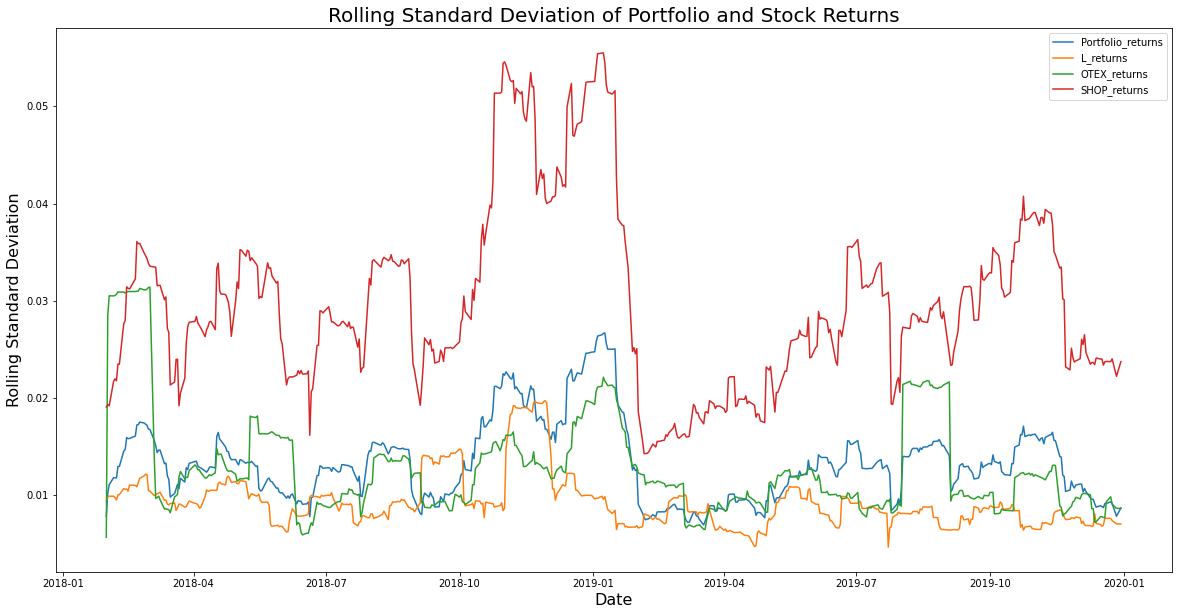

In [40]:
# Calculate rolling standard deviation

rollStdDev = all_returns.rolling(21).std()
rollStdDev = rollStdDev.dropna()

# Plot rolling standard deviation

fig = plt.figure(figsize=(20,10))
plt.plot(rollStdDev)
plt.title("Rolling Standard Deviation of Portfolio and Stock Returns", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rolling Standard Deviation', fontsize=16)
plt.legend(rollStdDev.columns)
plt.show()


### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation
correlation = all_returns.corr()
correlation

,Portfolio_returns,L_returns,OTEX_returns,SHOP_returns
Portfolio_returns,1.000000,0.390044,0.672637,0.913094
L_returns,0.390044,1.000000,0.181266,0.127501
OTEX_returns,0.672637,0.181266,1.000000,0.398427
SHOP_returns,0.913094,0.127501,0.398427,1.000000


<AxesSubplot:>

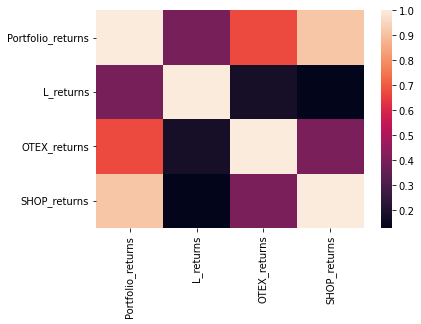

In [42]:
sns.heatmap(correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

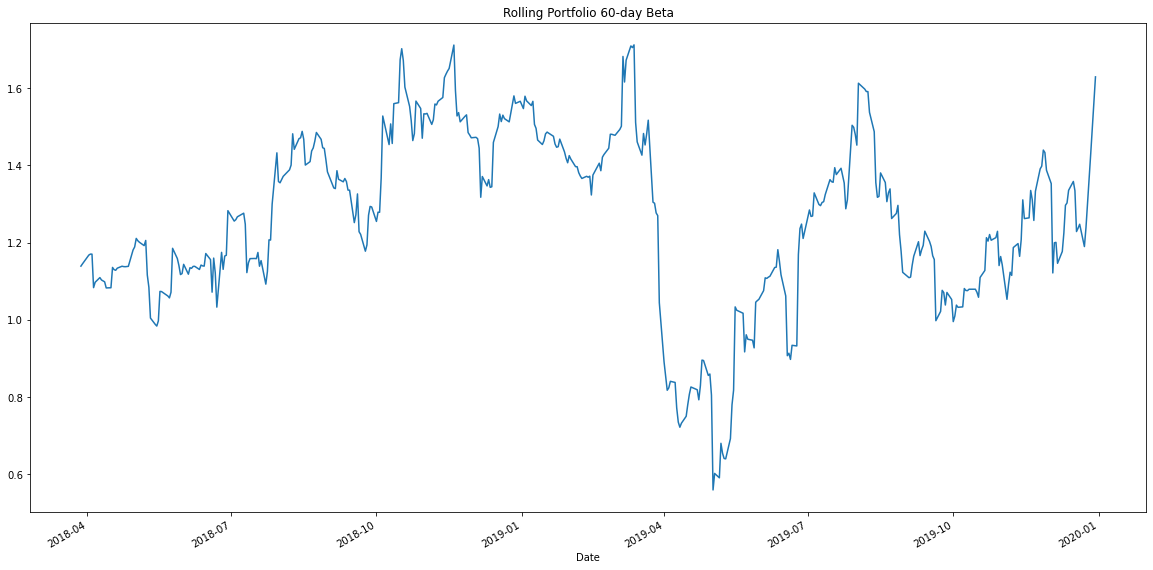

In [43]:
# Calculate and plot Beta

portfolio_analysis = pd.concat([port_returns, spTsx_history], axis='columns', join='inner')

portfolio_covariance = portfolio_analysis['Portfolio_returns'].rolling(60).cov(portfolio_analysis['S&P TSX'])
tsx_variance = portfolio_analysis['S&P TSX'].rolling(60).var()
rolling_portfolio_beta = portfolio_covariance/tsx_variance

ax = rolling_portfolio_beta.plot(figsize=(20, 10), title="Rolling Portfolio 60-day Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios

rf_rate = 0.0002 #I've assumed a risk-free rate of 5% per annum or 0.02% daily.

portfolio_analysis['rf_rate'] = rf_rate

portfolio_sharpe_ratios = ((portfolio_analysis.mean()-portfolio_analysis['rf_rate'].mean()) * 252) / (portfolio_analysis.std() * np.sqrt(252))
portfolio_sharpe_ratios

Portfolio_returns    1.391022
S&P TSX             -0.246918
rf_rate              0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

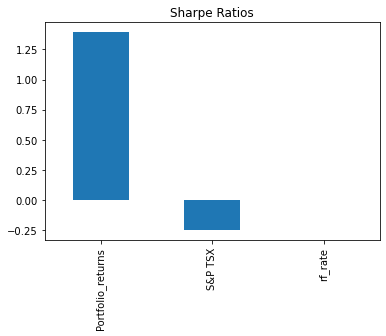

In [45]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

### From a risk/return perspective (Share Ratio), our portfolio does far better than the market. Also worth noting is that the marke has a negative sharpe ratio whereas our portfolio has a much higher positive ratio which indicates that our portfolio was superior.